In [23]:
import numpy as np
from numpy import pi, cos, sin

import matplotlib.pyplot as plt

# Reloading the module
import importlib

import Nodal2D
importlib.reload(Nodal2D)
from Nodal2D import *

import Curve
importlib.reload(Curve)
from Curve import *

import MappingGeometry2D
importlib.reload(MappingGeometry2D)
from MappingGeometry2D import *

## Boundary curves

In [24]:
# Creating curve1
# Create a curve class
c1 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c1.set_parameter_points(point_type="Legendre")
c1.set_BarycentricWeights()
c1.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 0
y_start = 0
x_end = 2
y_end = 0


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c1.reparameterization(x, y, x_deri, y_deri, par_range)
c1.cal_derivatives_node()

In [25]:
# Creating curve2
# Create a curve class
c2 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c2.set_parameter_points(point_type="Chebyshev")
c2.set_BarycentricWeights()
c2.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 2
y_start = 0
x_end = 3
y_end = 1


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c2.reparameterization(x, y, x_deri, y_deri, par_range)
c2.cal_derivatives_node()

In [26]:
# Creating curve3
# Create a curve class
c3 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c3.set_parameter_points(point_type="Legendre")
c3.set_BarycentricWeights()
c3.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 1
y_start = 1
x_end = 3
y_end = 1


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c3.reparameterization(x, y, x_deri, y_deri, par_range)
c3.cal_derivatives_node()

In [27]:
# Creating curve4
# Create a curve class
c4 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c4.set_parameter_points(point_type="Chebyshev")
c4.set_BarycentricWeights()
c4.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 0
y_start = 0
x_end = 1
y_end = 1


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c4.reparameterization(x, y, x_deri, y_deri, par_range)
c4.cal_derivatives_node()

In [28]:
print(c1.parameter_points - c1.parameter_points_original)
print(c2.parameter_points - c2.parameter_points_original)
print(c3.parameter_points - c3.parameter_points_original)
print(c4.parameter_points - c4.parameter_points_original)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13509689e-28 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13509689e-28 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00]


In [29]:
curves = [c1, c2, c3, c4]

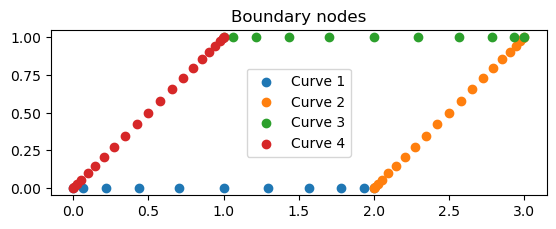

In [30]:
# Testing the geometry
fig, ax = plt.subplots(nrows=1, ncols=1)
for i, c in enumerate(curves):
    ax.scatter(c.x_nodes, c.y_nodes, label='Curve {}'.format(i+1))
ax.legend()
ax.set_title('Boundary nodes')
ax.set_aspect('equal')

## Inner nodes

In [31]:
N = 10
M = 5
nodal2D = Nodal2D(N,M)
nodal2D.cal_nodes(node_type_x="Legendre", node_type_y="Chebyshev")

## Mapping geometry class

In [32]:
mg = MappingGeometry2D(nodal2D=nodal2D, curves=curves)

In [33]:
# Testing the map
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Physical coordinates (general)", mg.cal_Map(xi, eta))
print("Physical coordinates (quad)", mg.cal_QuadMap(xi, eta))

Physical coordinates (general) [2.32246705 0.5582696 ]
Physical coordinates (quad) [2.32246705 0.5582696 ]


In [34]:
# Testing the map derivatives
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Metrics (general)", mg.cal_MapDerivatives(xi, eta))
print("Metrics (quad)", mg.cal_QuadMapDerivatives(xi, eta))

Metrics (general) (0.9999999999999876, 0.0, 0.5, 0.49999999999999434)
Metrics (quad) (1.0, 0.0, 0.5, 0.5)


In [35]:
mg.nodes_phy_x.shape

(11, 6)

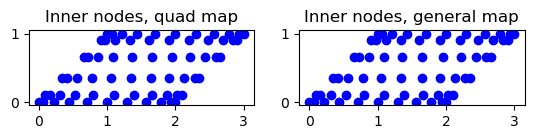

In [36]:
# Testing physical node calculation 
fig, ax = plt.subplots(nrows=1, ncols=2)
Nx = mg.nodal2D.Nx
Ny = mg.nodal2D.Ny

mg.cal_QuadMap_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[0].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[0].set_title('Inner nodes, quad map')
ax[0].set_aspect('equal')

mg.cal_Map_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[1].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[1].set_title('Inner nodes, general map')
ax[1].set_aspect('equal')

In [37]:
# Testing the derivative calculation
mg.cal_QuadMapDerivatives_nodes()
mg.X_xi

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [38]:
mg.cal_MapDerivatives_nodes()
mg.X_eta

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [39]:
# Testing the derivative calculation
mg.cal_QuadMapDerivatives_nodes()
mg.Y_xi

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [40]:
mg.cal_MapDerivatives_nodes()
mg.Y_eta

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [41]:
mg.cal_Jacobian()
mg.J

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [42]:
# Testing the normal vector calculation
mg.cal_normal_vector_nodes()
print("Lower normal vectors\n", mg.norm_vect_lower)
print("Upper normal vectors\n", mg.norm_vect_upper)
print("Left normal vectors\n", mg.norm_vect_left)
print("Right normal vectors\n", mg.norm_vect_right)

Lower normal vectors
 [[-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]]
Upper normal vectors
 [[-3.55271368e-15  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [ 8.88178420e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [-4.44089210e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00]
 [-8.88178420e-16  1.00000000e+00]
 [ 3.55271368e-15  1.00000000e+00]]
Left normal vectors
 [[-0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Right normal vectors
 [[ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
